#**Brain Tumor Detection**

CNN - Keras



**1- Importing The Laibrary**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization ,Activation
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


**2- Fitting the image**

In [ ]:
#Part 1 - Fitting the images 

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(
        rescale=1./255)

train_set = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/data/Brain/TRAIN',
        target_size= (128,128),
        batch_size=30,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/data/Brain/TEST',
        target_size= (128,128),
        batch_size=30,
        class_mode='binary')

Found 2816 images belonging to 2 classes.
Found 770 images belonging to 2 classes.


**3- Building The Model**

In [ ]:
#Part 2 - Building The Model

classifier = Sequential()

#Step 1 - Conv2D layers
#input shape = we put 3 for the colores
classifier.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3),  activation ='relu'))
classifier.add(Conv2D(32, kernel_size=(2, 2) ,  activation ='relu'))
classifier.add(BatchNormalization()) #For the overfitting

#Step 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size= (2,2)))


classifier.add(Conv2D(64, kernel_size=(2, 2),  activation ='relu'))
classifier.add(Conv2D(64, kernel_size=(2, 2) ,  activation ='relu'))
classifier.add(MaxPooling2D(pool_size= (2,2)))

#Step 3 - Flattening
classifier.add(Flatten()) 

#Step 4 Full connection - hidden layer
classifier.add(Dense(128,activation = 'relu')) #Hidden layer
classifier.add(Dropout(0.5)) #For the overfitting
#output layer
classifier.add(Dense(1 , activation='sigmoid'))

#Compile the CNN
classifier.compile(optimizer= 'Adam', loss= 'binary_crossentropy' , metrics= ['accuracy']) 

In [ ]:
#Part 3 - Fitting The Model
Ma = classifier.fit(train_set, epochs = 15, validation_data=test_set)

Epoch 1/15
94/94 [==============================] - 140s 1s/step - loss: 0.6859 - accuracy: 0.7067 - val_loss: 0.6862 - val_accuracy: 0.5000
Epoch 2/15
94/94 [==============================] - 139s 1s/step - loss: 0.4239 - accuracy: 0.7884 - val_loss: 0.6605 - val_accuracy: 0.5364
Epoch 3/15
94/94 [==============================] - 139s 1s/step - loss: 0.3498 - accuracy: 0.8434 - val_loss: 0.5825 - val_accuracy: 0.7468
Epoch 4/15
94/94 [==============================] - 138s 1s/step - loss: 0.2991 - accuracy: 0.8654 - val_loss: 0.6148 - val_accuracy: 0.6506
Epoch 5/15
94/94 [==============================] - 138s 1s/step - loss: 0.2611 - accuracy: 0.8913 - val_loss: 0.4150 - val_accuracy: 0.8156
Epoch 6/15
94/94 [==============================] - 139s 1s/step - loss: 0.2368 - accuracy: 0.9052 - val_loss: 0.3605 - val_accuracy: 0.8468
Epoch 7/15
94/94 [==============================] - 139s 1s/step - loss: 0.2148 - accuracy: 0.9165 - val_loss: 0.3819 - val_accuracy: 0.8286
Epoch 8/15
94

**4- Accuracy Graph**

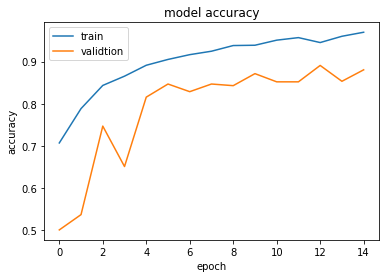

In [ ]:
# Summarize For Accuracy
plt.plot(Ma.history['accuracy'])
plt.plot(Ma.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validtion'], loc='upper left')
plt.show()

**5- Loss Graph**

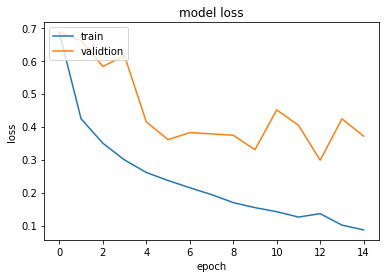

In [ ]:
# Summarize For Loss
plt.plot(Ma.history['loss'])
plt.plot(Ma.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validtion'], loc='upper left')
plt.show()

**6- Prediction Part**

In [ ]:
classes = os.listdir('/content/drive/MyDrive/data/Brain/TRAIN')

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit([[0] , [1]]) 
print(classes[0])
print(classes[1])

Yes
No


In [ ]:
def names(number):
    if(number == 0):
        return classes[0] + '' ',it is a tumor'
    elif(number == 1):
        return classes[1] + '' ',it is not a tumor'

100.0% Confidence it is tumor therefore; Yes,it is a tumor


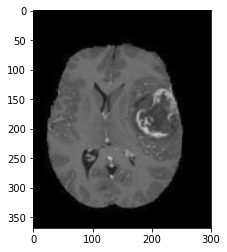

In [ ]:
from matplotlib.pyplot import imshow
i = Image.open(r'/content/drive/MyDrive/_Fig1_HTML.jpg')
x = np.array(i.resize((128,128)))
x = x.reshape(1,128,128,3)
pred = classifier.predict_on_batch(x)
classification = np.where(pred == np.amax(pred))[1][0]
imshow(i)
con = pred[0][classification]*100
if con >= 0.5*100:
  print(str(con) + '% Confidence it is tumor therefore; ' + names(0))
else:
  print(str(con) +'% Confidence it is not tumor therefore; ' + names(1))

0.0% Confidence it is not tumor therefore; No,it is not a tumor


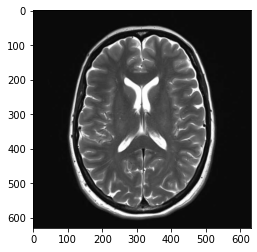

In [ ]:
from matplotlib.pyplot import imshow
i= Image.open(r'/content/drive/MyDrive/6.jpg')
x = np.array(i.resize((128,128)))
x = x.reshape(1,128,128,3)
pred = classifier.predict_on_batch(x)
classification = np.where(pred == np.amax(pred))[1][0]
imshow(i)
con = pred[0][classification]*100
if con >= 0.5*100:
  print(str(con) + '% Confidence it is tumor therefore; ' + names(0))
else:
  print(str(con) +'% Confidence it is not tumor therefore; ' + names(1))